In [1]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calc_avg_std(df):
    df_avg = df.groupby(['p'], as_index=False).agg({'num_stable':['mean','std'], 'frac_unstable':['mean','std']})
    df_avg.columns = df_avg.columns.get_level_values(0) + '_' +  df_avg.columns.get_level_values(1)
    return df_avg

In [3]:
def plot_counts(df, x_label, y_label, r, p, n, x_col="p", y_col="num_stable"):
    index = 0
    colors = cm.rainbow(np.linspace(0, 1, 5))
    fig, ax = plt.subplots(figsize=(9,6))
    for label, tmp_df in df.groupby('run'):
        tmp_df.plot(x=x_col, y=y_col, kind="line", ax=ax, xlabel=x_label, ylabel=y_label, label=label, color=np.array([colors[index]]))
        index += 1
    plt.legend(title="Run")
    plt.title("Runs: {}, Number of imprints: {}, Number of neurons: {}".format(r, p, n))
    plt.savefig("{}_{}_{}_{}.png".format(r, p, n, y_col))

In [8]:
def plot_avg(df, x_label, y_label, r, p, n, x_col="p", y_col="num_stable"):
    plt.subplots(figsize=(9,6))
    x = df[x_col].values
    y = df[y_col+"_mean"].values
    error = df[y_col+"_std"].values
    plt.plot(x, y, 'k-')
    plt.fill_between(x, y-error, y+error)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title("Runs: {}, Number of imprints: {}, Number of neurons: {}".format(r, p, n))
    plt.savefig("{}_{}_{}_{}.png".format(r, p, n, y_col+"_mean_std"))

In [9]:
def make_figs(df, r, p, n):
    plot_counts(df, "Number of imprints (p)", "Number of stable imprints", r, p, n)
    plot_counts(df, "Number of imprints (p)", "Fraction of unstable imprints", r, p, n, y_col="frac_unstable")
    df_avg = calc_avg_std(df)
    plot_avg(df_avg, "Number of imprints (p)", "Average of number of stable imprints", r, p, n, x_col="p_", y_col="num_stable")
    plot_avg(df_avg, "Number of imprints (p)", "Average of fraction of unstable imprints", r, p, n, x_col="p_", y_col="frac_unstable")
    

In [10]:
df_5_50_100 = pd.read_csv("5_50_100.csv")
df_5_50_200 = pd.read_csv("5_50_200.csv")
df_5_100_200 = pd.read_csv("5_100_200.csv")
df_5_200_400 = pd.read_csv("5_200_400.csv")

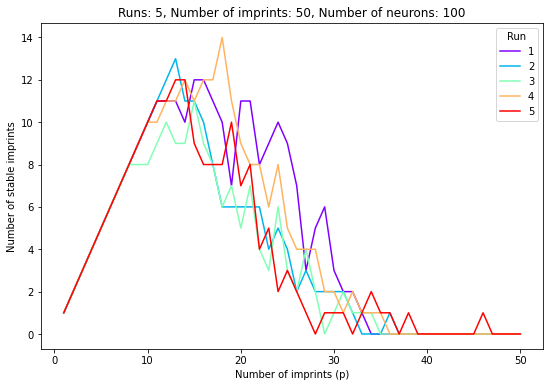

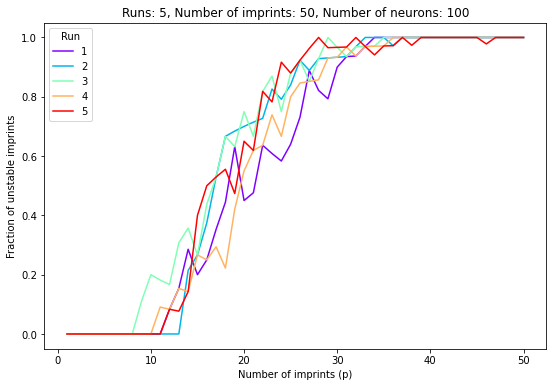

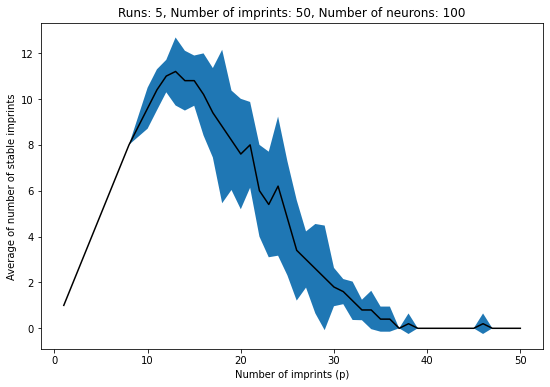

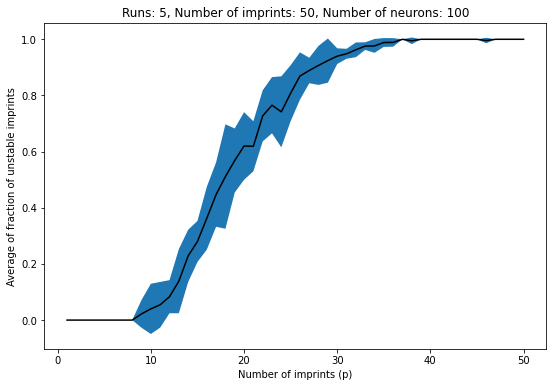

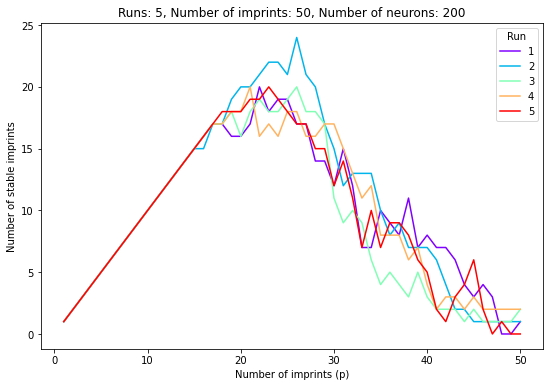

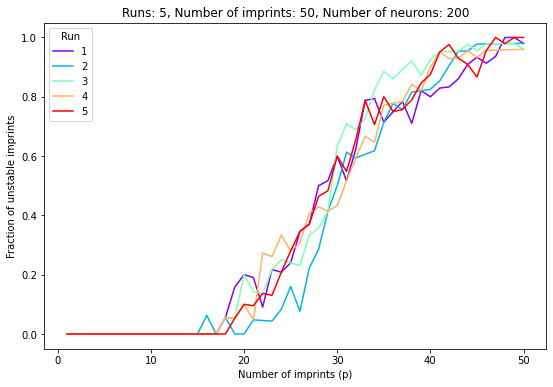

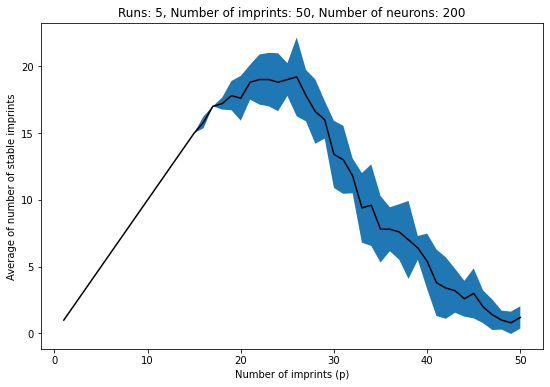

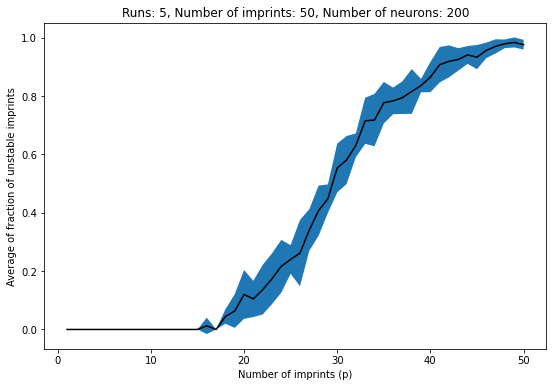

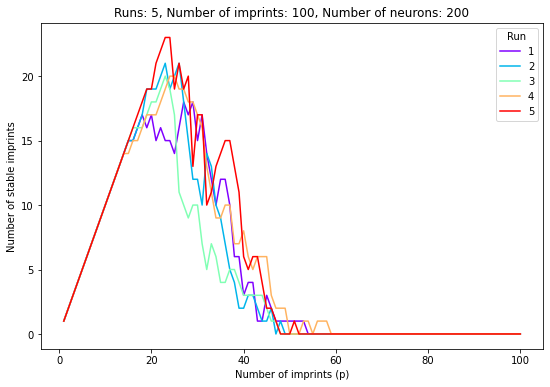

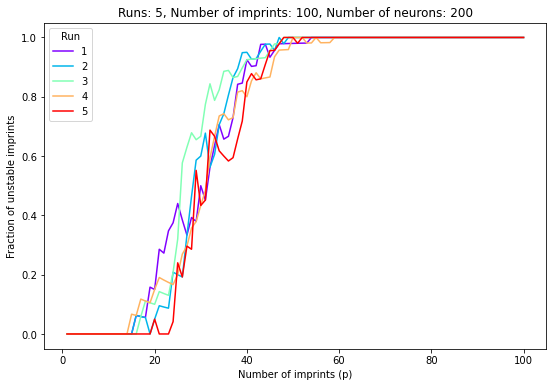

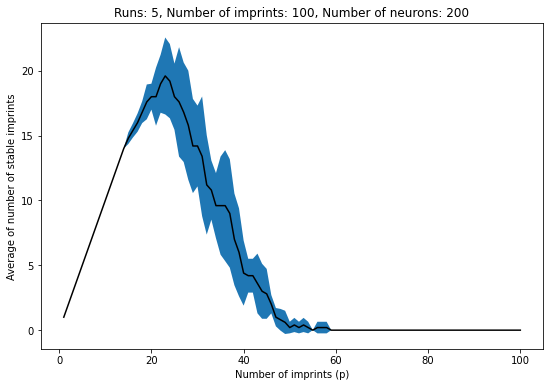

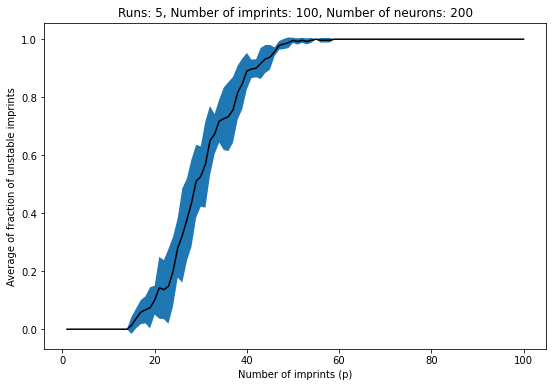

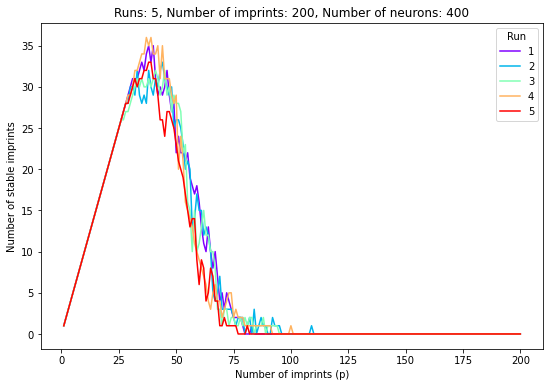

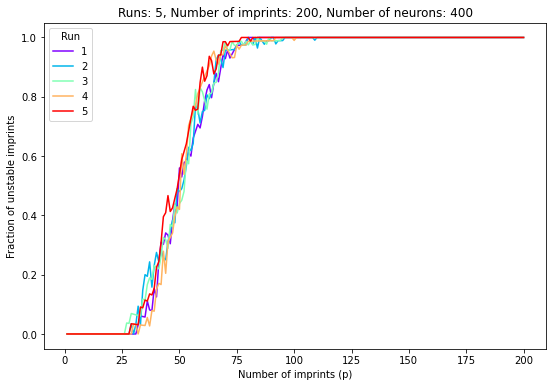

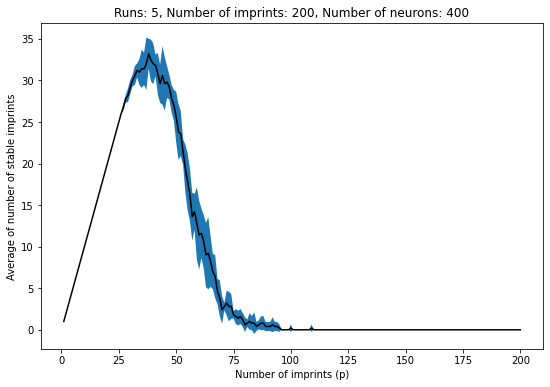

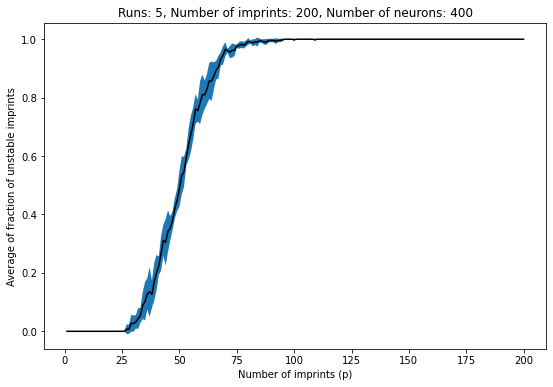

In [11]:
make_figs(df_5_50_100, 5, 50, 100)
make_figs(df_5_50_200, 5, 50, 200)
make_figs(df_5_100_200, 5, 100, 200)
make_figs(df_5_200_400, 5, 200, 400)